In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x151e69e8150>)

In [4]:
import pandas as pd

In [5]:
medical_df=pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)

In [8]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [9]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
colu=['age','bmi','children','charges']

new_medical=medical_df[colu]
new_medical

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

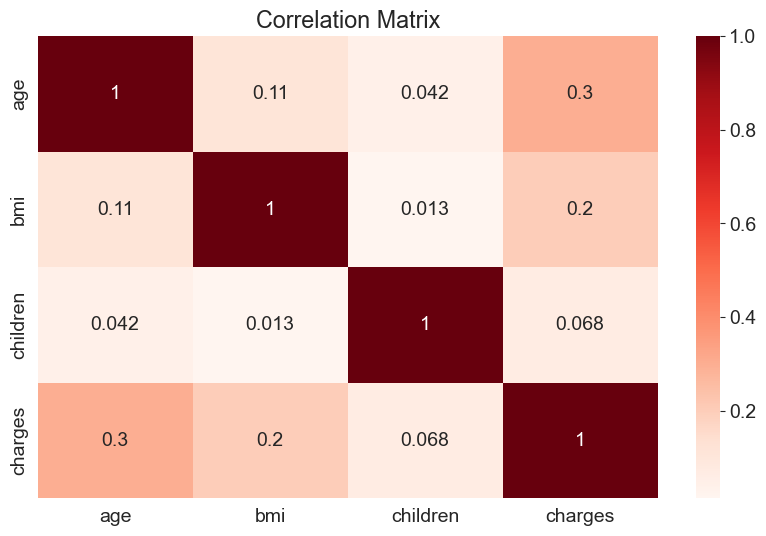

In [15]:


sns.heatmap(new_medical.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix');

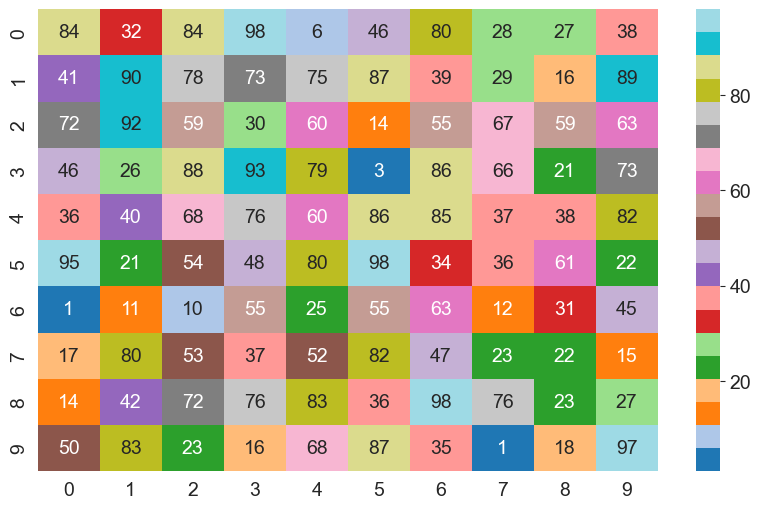

In [20]:
import numpy as np

data=np.random.randint(low=1,high=100,size=(10,10))
hm=sns.heatmap(data=data,cmap='tab20',annot=True)
plt.show()

##  Linear Regression using a single Feature

In [22]:
non_smoker_df=medical_df[medical_df.smoker=='no']
print(non_smoker_df)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

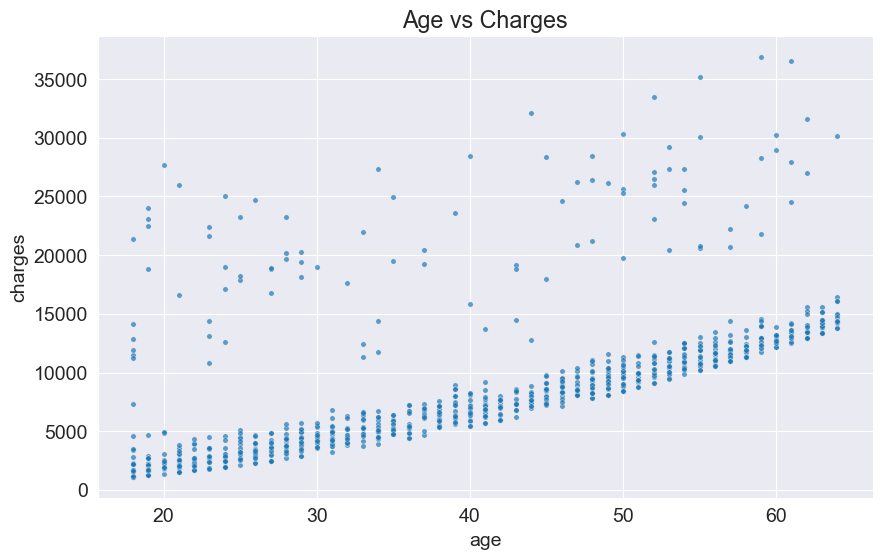

In [23]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)

Text(0, 0.5, 'Estimated Charges')

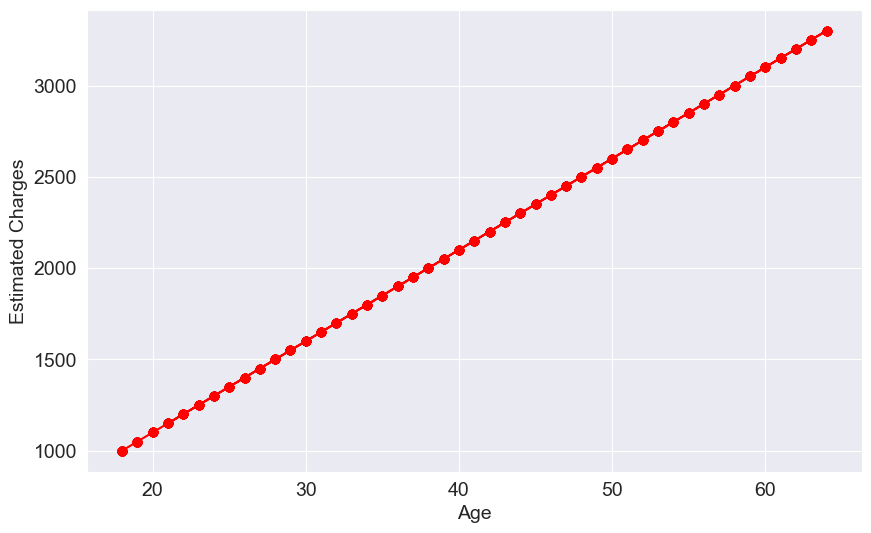

In [24]:
def estimate_charges(age,w,b):
    return w*age+b


w=50
b=100
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

In [26]:
print(estimate_charges(53,w,b))

2750


In [32]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
print(medical_df['smoker'].values[0])

yes


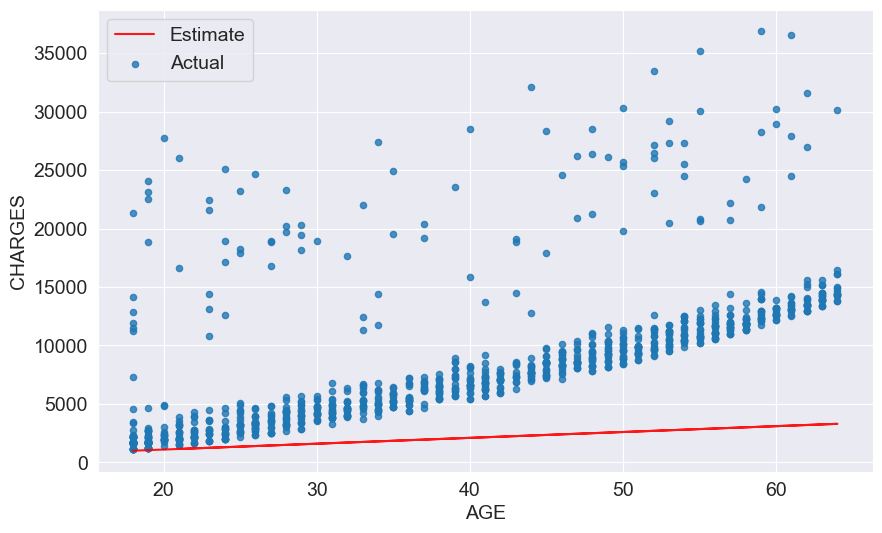

In [40]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9)
plt.scatter(ages,target,s=20,alpha=0.8);
plt.xlabel('AGE')
plt.ylabel('CHARGES')
plt.legend(['Estimate','Actual'])

In [46]:
def try_parameters(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    
    estimated_charges=estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(ages,target,s=20,alpha=0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

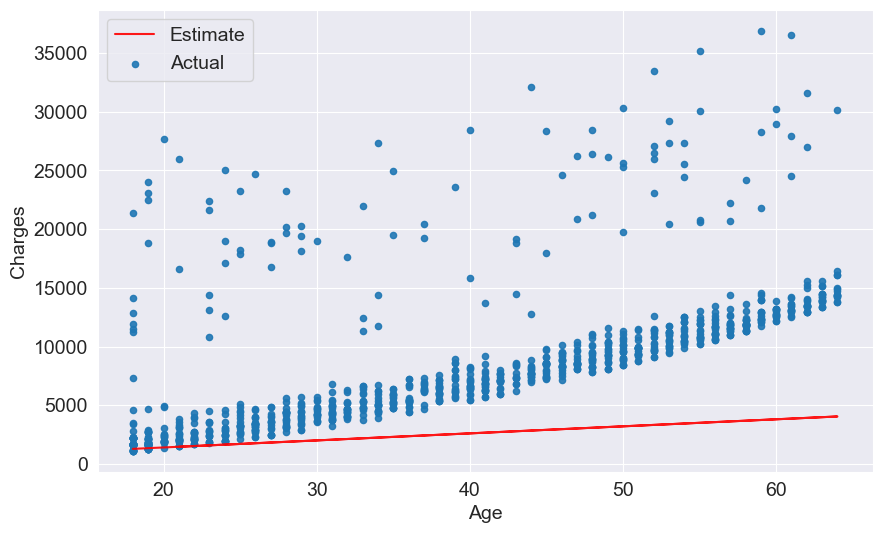

In [47]:
try_parameters(60,200)

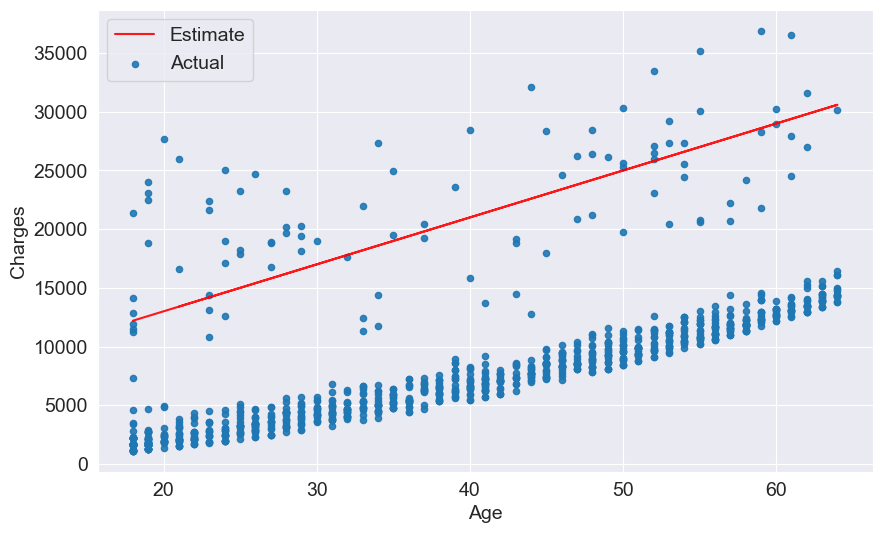

In [48]:
try_parameters(400,5000)

# Loss and Cost Fuction

In [49]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

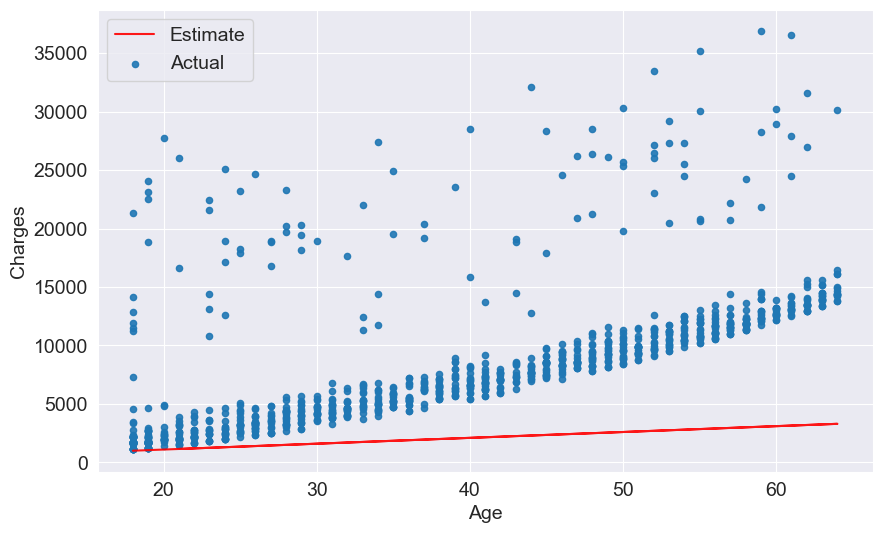

In [50]:
try_parameters(w,b)

In [51]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age,w,b)
rmse(targets,predicted)

8461.949562575493

In [54]:
def try_parameters(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    predictions=estimate_charges(ages,w,b)
    
    plt.plot(ages,predictions,'r',alpha=0.9);
    plt.scatter(ages,target,s=20,alpha=0.9);
    plt.xlabel('AGE')
    plt.ylabel('Charges')
    plt.legend(['Prediction','Actual']);
    loss=rmse(target,predictions)
    print("RMSE LOSS: ",loss)

RMSE LOSS:  8461.949562575493


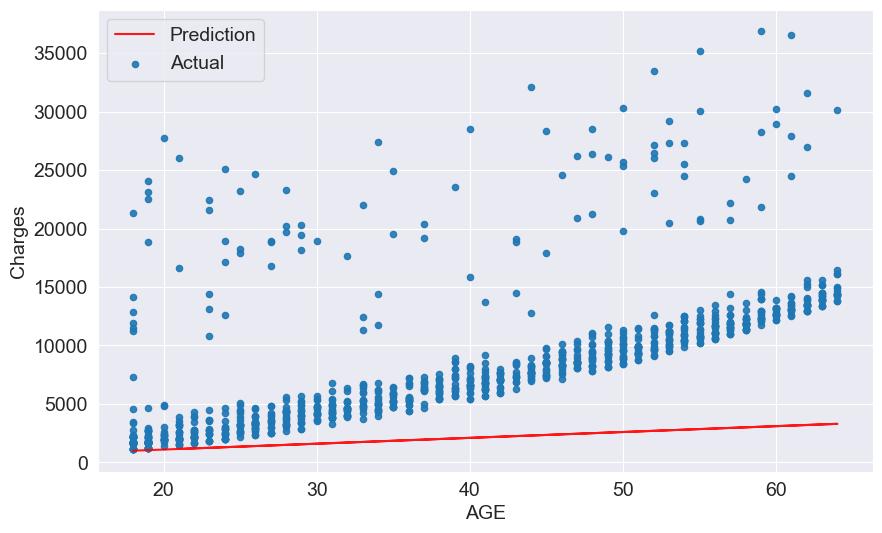

In [55]:
try_parameters(50,100)

#   Linear Regression using Scikit-learn

In [56]:
!pip install scikit-learn --quiet

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model=LinearRegression()

In [60]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print(f'input shape:{inputs.shape} target.shape:{targets.shape}')

input shape:(1064, 1) target.shape:(1064,)
